# Gaussian processes and Bayesian optimization

In this assignment you will learn how to use <a href="http://sheffieldml.github.io/GPy/">GPy</a> and <a href="http://sheffieldml.github.io/GPyOpt/">GPyOpt</a> libraries to deal with gaussian processes. These libraries provide quite simple and inuitive interfaces for training and inference, and we will try to get familiar with them in a few tasks.

### Installation
New libraries that are required for this tasks can be installed with the following command (if you use Anaconda):

```bash
pip install GPy 
pip install gpyopt 
pip install xgboost 
```

You can also follow installtaion guides from <a href="https://github.com/SheffieldML/GPy">GPy</a> and <a href="http://sheffieldml.github.io/GPyOpt/firststeps/index.html">GPyOpt</a> if you want to build them from source

You will also need following libraries: ```numpy```, ```scikit-learn```, ```matplotlib```

In [1]:
import numpy as np
import GPy
import GPyOpt
import matplotlib.pyplot as plt
from sklearn.svm import SVR
import sklearn.datasets
from xgboost import XGBRegressor
from sklearn.cross_validation import cross_val_score
import time
from grader import Grader
%matplotlib inline

 /Users/kyryl/vn/mooc/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning:This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.


### Grading
We will create a grader instace below and use it to collect your answers. Note that these outputs will be stored locally inside grader and will be uploaded to platform only after running submiting function in the last part of this assignment. If you want to make partial submission, you can run that cell any time you want.

In [2]:
grader = Grader()

## Gaussian processes: GPy (<a href="http://pythonhosted.org/GPy/">documentation</a>)

We will start with a simple regression problem, for which we will try to fit a Gaussian Process with RBF kernel.

In [3]:
def generate_points(n=25, noise_variance=0.0036):
    np.random.seed(777)
    X = np.random.uniform(-3.,3.,(n,1))
    y = np.sin(X) + np.random.randn(n,1)*noise_variance**0.5
    return X, y
    
def generate_noise(n=25, noise_variance=0.0036):
    np.random.seed(777)
    X = np.random.uniform(-3.,3.,(n,1))
    y = np.random.randn(n,1)*noise_variance**0.5
    return X, y

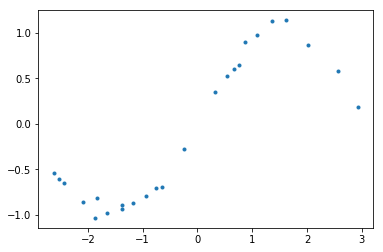

(25, 1)


In [4]:
# Create data points
X, y = generate_points()
plt.plot(X, y, '.')
plt.show()
print(X.shape)

To fit a Gaussian Process, you will need to define a kernel. For Gaussian (GBF) kernel you can use *GPy.kern.RBF*
function.

<b> Task 1.1: </b> Create RBF kernel with variance 1.5 and length-scale parameter 2 for 1D samples and compute value of the kernel between 6-th and 10-th points (one-based indexing system). Submit a single number. 
<br><b>Hint:</b> use ```.K``` property of kernel object.

In [5]:
### YOUR CODE HERE
kernel =  GPy.kern.RBF(input_dim=1, variance=1.5, lengthscale=2)
### YOUR CODE HERE
kernel_59 = kernel.K(X)[5, 9]
grader.submit_GPy_1(kernel_59)

Current answer for task 1.1 is: 1.0461813545396959


<b> Task 1.2: </b> Fit GP into generated data. Use kernel from previous task. Submit predicted mean and vairance at position $x=1$.
<br><b>Hint:</b> use ```GPy.models.GPRegression``` class.

In [8]:
model = GPy.models.GPRegression(X, y, kernel)
test_input = np.ones((1, 1), dtype=np.float64)

mean = model.predict(Xnew=test_input)[0][0][0]
variance = model.predict(Xnew=test_input)[1][0][0]
grader.submit_GPy_2(mean, variance)

Current answer for task 1.2 (mean) is: 0.6646774926102939
Current answer for task 1.2 (variance) is: 1.1001478223790582


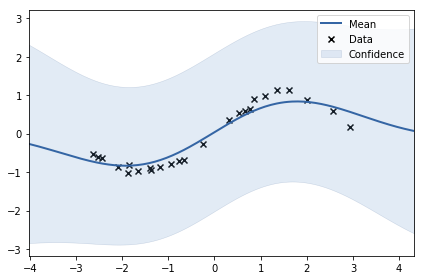

In [9]:
model.plot()
plt.show()

We see that model didn't fit the data quite well. Let's try to fit kernel and noise parameters automatically as discussed in the lecture! You can see current parameters below:

In [10]:
model

GP_regression.,value,constraints,priors
rbf.variance,1.5,+ve,
rbf.lengthscale,2.0,+ve,
Gaussian_noise.variance,1.0,+ve,


<b> Task 1.3: </b> Optimize length-scale, variance and noise component of the model and submit optimal length-scale value of the kernel. 
<br><b>Hint:</b> Use ```.optimize()``` function of the model and ```.lengthscale``` property of the kernel.

In [11]:
### YOUR CODE HERE
model.optimize()
lengthscale = model.kern.lengthscale
grader.submit_GPy_3(lengthscale)

Current answer for task 1.3 is: 1.6252681918414438


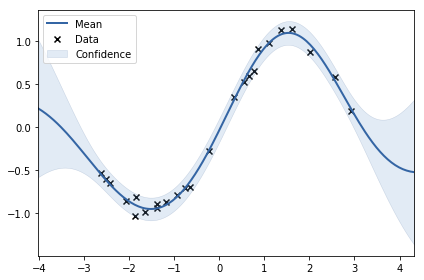

In [12]:
model.plot()
plt.show()

As you see, process generates outputs just right. Let's see if GP can figure out itself when we try to fit it into  noise or signal.

<b> Task 1.4: </b> Generate two datasets: sinusoid wihout noise and samples from gaussian noise. Optimize kernel parameters and submit optimal values of noise component.
<br><b>Note:</b> generate data only using ```generate_points(n, noise_variance)``` and ```generate_noise(n, noise_variance)``` function!


Name : GP regression
Objective : 68.75241597935606
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |               value  |  constraints  |  priors
  rbf.variance             |  1.3087564583457012  |      +ve      |        
  rbf.lengthscale          |   4.715080386491272  |      +ve      |        
  Gaussian_noise.variance  |  13.563737592030373  |      +ve      |        


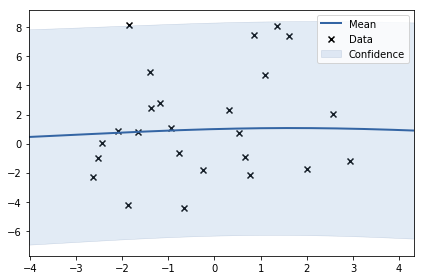

In [29]:
X, y = generate_noise(noise_variance=10)
### YOUR CODE HERE
model_noise = GPy.models.GPRegression(X, y, kernel)
model_noise.optimize()

noise = model_noise.Gaussian_noise.variance
print(model_noise)

model_noise.plot()
plt.show()


Name : GP regression
Objective : -140.2895651992969
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |                  value  |  constraints  |  priors
  rbf.variance             |     4.0256338270009815  |      +ve      |        
  rbf.lengthscale          |      2.645650054620033  |      +ve      |        
  Gaussian_noise.variance  |  2.690029916716192e-14  |      +ve      |        


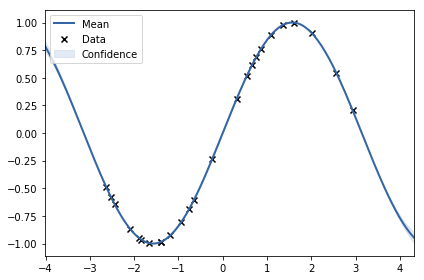

In [32]:
X, y = generate_points(noise_variance=0)
### YOUR CODE HERE
model_signal = GPy.models.GPRegression(X, y, kernel)
model_signal.optimize()

just_signal = model_signal.Gaussian_noise.variance
print(model_signal)
model_signal.plot()
plt.show()

In [33]:
grader.submit_GPy_4(noise, just_signal)

Current answer for task 1.4 (noise) is: 13.563737592030373
Current answer for task 1.4 (just signal) is: 2.690029916716192e-14


#### Sparce GP
Now let's consider the speed of GP. We will generate a dataset of 3000 points and measure time that is consumed for prediction of mean and variance for each point. We will then try to use indusing inputs and find optimal number of points according to quality-time tradeoff.

For sparse model with inducing points you should use ```GPy.models.SparseGPRegression``` class. You can set number of inducing inputs with parameter ```num_inducing``` and optimize their positions and values with ```.optimize()``` call.

<b>Task 1.5</b>: Create a dataset of 1000 points and fit GPRegression. Measure time for predicting mean and variance at position $x=1$. Then fit SparseGPRegression with 10 inducing inputs and repeat the experiment. Report speedup as a ratio between consumed time without and with inducing inputs.

In [36]:
X, y = generate_points(1000)

In [44]:
start = time.time()
### YOUR CODE HERE
model_reg = GPy.models.GPRegression(X, y, kernel)
model_reg.optimize()
print(model_reg.predict(Xnew=np.ones((1, 1), dtype=np.float64)))

time_gp = time.time()-start

(array([[0.84906984]]), array([[0.00392273]]))


In [45]:
start = time.time()
### YOUR CODE HERE
model_sparse = GPy.models.SparseGPRegression(X, y, kernel)
model_sparse.optimize()
print(model_sparse.predict(Xnew=np.ones((1, 1), dtype=np.float64)))

time_sgp = time.time()-start

(array([[0.84907158]]), array([[0.00392264]]))


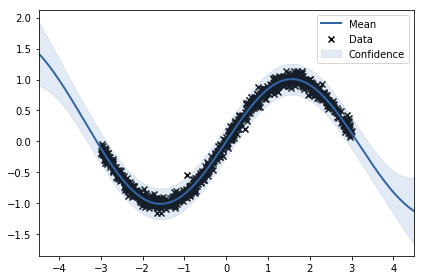

In [50]:
model_reg.plot()
plt.show()

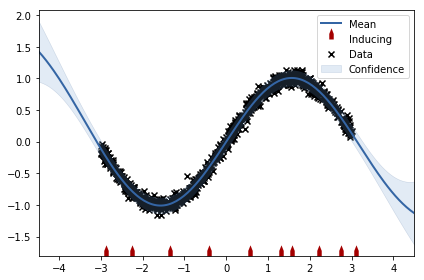

In [51]:
model_sparse.plot()
plt.show()

In [47]:
grader.submit_GPy_5(time_gp / time_sgp)

Current answer for task 1.5 is: 3.812197403723387


## Bayesian optimization: GPyOpt (<a href="http://pythonhosted.org/GPyOpt/">documentation</a>, <a href="http://nbviewer.jupyter.org/github/SheffieldML/GPyOpt/blob/master/manual/index.ipynb">tutorials</a>)

In this part of the assignment we will try to find optimal hyperparameters to XGBoost model! We will use data from a small competition to speed things up, but keep in mind that the approach works even for large datasets.

We will use diabetes dataset provided in sklearn package.

In [52]:
dataset = sklearn.datasets.load_diabetes()
X = dataset['data']
y = dataset['target']

We will use cross validation score to estimate accuracy and our goal will be to tune: ```max_depth```, ```learning_rate```, ```n_estimators``` parameters. The baseline MSE with default XGBoost parameters is $0.2$. Let's see if we can do better. First we have to define optimization function and domains.

In [53]:
# Score. Optimizer will try to find minimum, so we will add a "-" sign.
def f(parameters):
    parameters = parameters[0]
    score = -cross_val_score(
                XGBRegressor(learning_rate=parameters[0],
                              max_depth=int(parameters[2]),
                              n_estimators=int(parameters[3]),
                              gamma=int(parameters[1]),
                              min_child_weight = parameters[4]), 
                X, y, scoring='neg_mean_squared_error').mean()
    score = np.array(score)
    return score

In [54]:
baseline = -cross_val_score(XGBRegressor(), X, y, scoring='neg_mean_squared_error').mean()
baseline

3498.951701204653

In [55]:
# Bounds (NOTE: define continuous variables first, then discrete!)
bounds = [
            {'name': 'learning_rate', 'type': 'continuous', 'domain': (0, 1)},
            {'name': 'gamma', 'type': 'continuous', 'domain': (0, 5)},
            {'name': 'max_depth', 'type': 'discrete', 'domain': (1, 50)},
            {'name': 'n_estimators', 'type': 'discrete', 'domain': (1, 300)},
            {'name': 'min_child_weight', 'type': 'discrete', 'domain': (1, 10)}
         ]

In [56]:
np.random.seed(777)
optimizer = GPyOpt.methods.BayesianOptimization(f=f, domain=bounds,
                                                acquisition_type ='MPI',
                                                acquisition_par = 0.1,
                                                exact_eval=True)

In [57]:
max_iter = 50
max_time = 60
optimizer.run_optimization(max_iter, max_time)

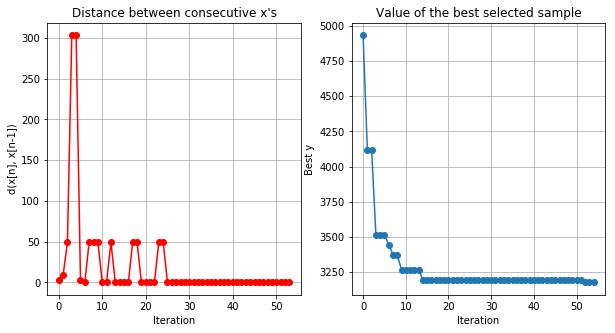

In [58]:
optimizer.plot_convergence()

Best values of parameters:

In [59]:
optimizer.X[np.argmin(optimizer.Y)]

array([7.05341541e-02, 2.96680297e+00, 1.00000000e+00, 3.00000000e+02,
       1.00000000e+00])

In [60]:
print('MSE:', np.min(optimizer.Y), 'Gain:', baseline/np.min(optimizer.Y)*100)

MSE: 3177.104950618676 Gain: 110.13018945198219


We were able to get 9% boost wihtout tuning parameters by hand! Let's see if you can do the same. 

<b>Task 2.1:</b> Tune SVR model. Find optimal values for three parameters: ```C```, ```epsilon``` and ```gamma```. Use range (1e-5, 1000) for ```C```, (1e-5, 10) for ```epsilon``` and ```gamma```. Use MPI as acquisition function with weight 0.1. Submit optimal value of epsilon that was found by a model.

SVR baseline is 6067.652263997995


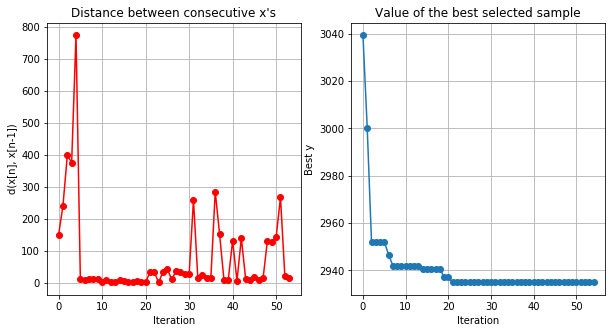

In [68]:
### YOUR CODE HERE
def f_svr(parameters):
    parameters = parameters[0]
    estimator = SVR(C=parameters[0], epsilon=parameters[1], gamma=parameters[2])
    score = -cross_val_score(estimator, X, y, scoring='neg_mean_squared_error').mean()
    score = np.array(score)
    return score

baseline = -cross_val_score(SVR(), X, y, scoring='neg_mean_squared_error').mean()
print(f"SVR baseline is {baseline}")

bounds_svr = [
            {'name': 'C', 'type': 'continuous', 'domain': (1e-5, 1000)},
            {'name': 'epsilon', 'type': 'continuous', 'domain': (1e-5, 10)},
            {'name': 'gamma', 'type': 'continuous', 'domain': (1e-5, 10)}    
         ]

np.random.seed(777)
optimizer_svr = GPyOpt.methods.BayesianOptimization(f=f_svr, domain=bounds_svr,
                                                acquisition_type ='MPI',
                                                acquisition_par = 0.1,
                                                exact_eval=True)

max_iter = 50
max_time = 60
optimizer_svr.run_optimization(max_iter, max_time)

optimizer_svr.plot_convergence()
plt.show()


In [71]:
print(optimizer_svr.X[np.argmin(optimizer_svr.Y)])
print('MSE:', np.min(optimizer_svr.Y), 'Gain:', baseline/np.min(optimizer_svr.Y)*100)

[59.67320984  6.81479701  8.88644419]
MSE: 2934.9026571836016 Gain: 206.7411758664817


In [72]:
best_epsilon = 6.81479701
grader.submit_GPyOpt_1(best_epsilon)

Current answer for task 2.1 is: 6.81479701


<b>Task 2.2:</b> For the model above submit boost in improvement that you got after tuning hyperparameters (output percents) [e.g. if baseline MSE was 40 and you got 20, output number 200]

In [77]:
performance_boost = baseline/np.min(optimizer_svr.Y) ### YOUR CODE HERE
grader.submit_GPyOpt_2(performance_boost*100)

Current answer for task 2.2 is: 206.7411758664817


### Authorization & Submission
To submit assignment parts to Cousera platform, please, enter your e-mail and token into variables below. You can generate token on this programming assignment page. <b>Note:</b> Token expires 30 minutes after generation.

In [78]:
STUDENT_EMAIL = "truskovskiyk@gmail.com"
STUDENT_TOKEN = "TOKEN"
grader.status()

You want to submit these numbers:
Task 1.1: 1.0461813545396959
Task 1.2 (mean): 0.6646774926102939
Task 1.2 (variance): 1.1001478223790582
Task 1.3: 1.6252681918414438
Task 1.4 (noise): 13.563737592030373
Task 1.4 (just signal): 2.690029916716192e-14
Task 1.5: 3.812197403723387
Task 2.1: 6.81479701
Task 2.2: 206.7411758664817


If you want to submit these answers, run cell below

In [79]:
grader.submit(STUDENT_EMAIL, STUDENT_TOKEN)

Submitted to Coursera platform. See results on assignment page!
